In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import re

In [2]:
#DATA PREVIEW

df = pd.read_csv('googleplaystore.csv')
print('Total number of unique apps in the dataset = ', len(df.App.unique()))
df = df.drop_duplicates()
df.head()

Total number of unique apps in the dataset =  9660


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
#DATA CLEANING

chars_to_remove = [',', '+']
regular_expression = '[' + re.escape (''. join (chars_to_remove)) + ']'
df['Installs'] = df['Installs'].str.replace(regular_expression, '', regex=True)
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce').fillna(0.0).astype(int)

df['Price'] = df['Price'].str.replace("$", '', regex=False)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce').fillna(0.0).astype(float)

df['Type'] = df['Type'].str.replace('0','Free')

df = df.drop(["Current Ver"], axis=1)

df.drop(df.index[df['Category'] == '1.9'], inplace = True)

df.sample(20)   

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Android Ver
1335,Meditation Studio,HEALTH_AND_FITNESS,4.6,1026,29M,10000,Paid,3.99,Everyone,Health & Fitness,"May 15, 2018",4.3 and up
4986,Alchemy Classic Ad Free,FAMILY,4.6,20178,9.0M,100000,Free,0.00,Everyone,Puzzle,"May 26, 2014",1.6 and up
6070,Hair Salon - Fun Games,FAMILY,3.8,484226,27M,50000000,Free,0.00,Teen,Casual,"June 15, 2018",4.0 and up
8263,MARVEL Avengers Academy,GAME,4.2,304106,Varies with device,10000000,Free,0.00,Teen,Adventure,"August 6, 2018",4.0.3 and up
9500,Ek Onkar,FAMILY,4.9,107,18M,10000,Free,0.00,Everyone,Entertainment,"April 3, 2016",4.0 and up
3991,Mobile C [ C/C++ Compiler ],FAMILY,4.3,4624,78M,100000,Free,0.00,Everyone,Education,"July 7, 2018",4.0.3 and up
7074,WISE- MOBILE PORTAL,TOOLS,NaN,3,1.0M,500,Free,0.00,Everyone,Tools,"July 30, 2015",2.2 and up
5277,Puppy Shooting an AK-47: Platformer Zombie Game,GAME,4.8,21,89M,1000,Free,0.00,Everyone,Arcade,"March 30, 2018",4.4 and up
8793,Dr. Seuss's ABC,FAMILY,4.7,429,12M,10000,Paid,3.99,Everyone,Books & Reference;Education,"February 26, 2018",4.0.3 and up
9038,Age of Procreation DX,FAMILY,4.3,1894,40M,100000,Free,0.00,Mature 17+,Simulation,"April 22, 2016",2.3 and up


In [4]:
#TOTAL MARKET SIZE

print('Total number of apps\' downloads: ' + str(df["Installs"].sum()) + '+')
df['Total_money'] = df['Installs'] * df['Price']
print('Total amount of money spent on paid apps: $' + str(round(df['Total_money'].sum(),2)))

Total number of apps' downloads: 146631914527+
Total amount of money spent on paid apps: $367471847.79


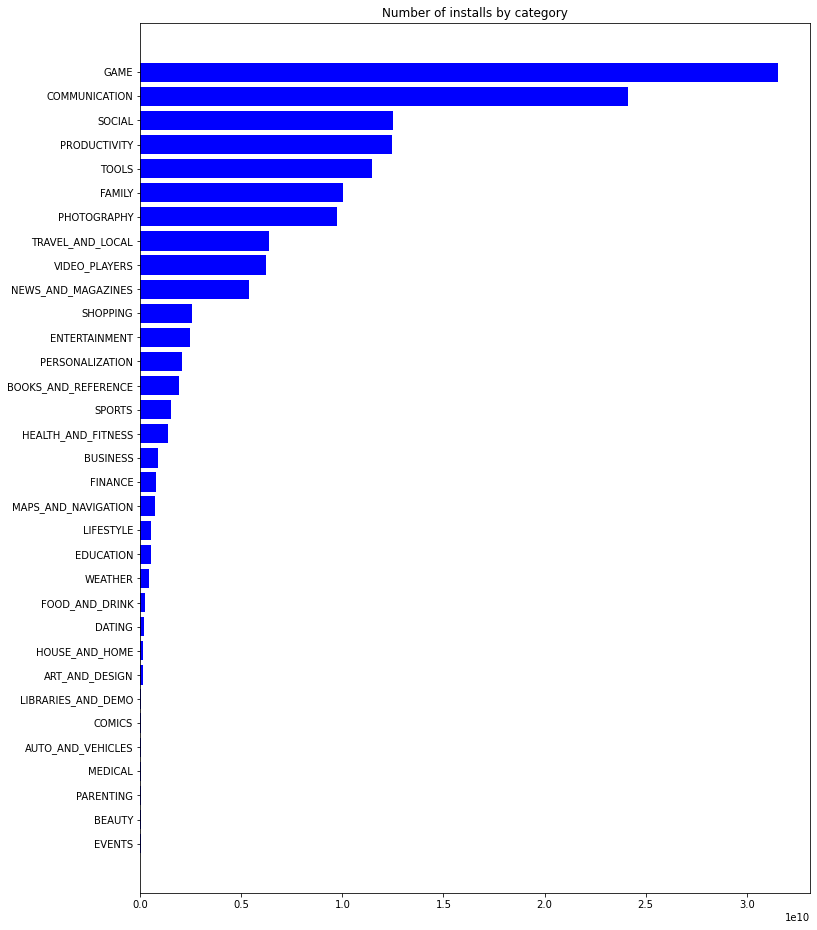

In [5]:
#MARKET SIZE BY CATEGORY

data_category = df.groupby('Category').sum()['Installs'].sort_values(ascending= True)

x = data_category.index.values
y= data_category.values
x_pos = [i for i, _ in enumerate(x)]
plt.figure(figsize=(12,16))
plt.barh(x_pos, y, color='blue')
plt.title("Number of installs by category")
plt.yticks(x_pos, x)

plt.show()


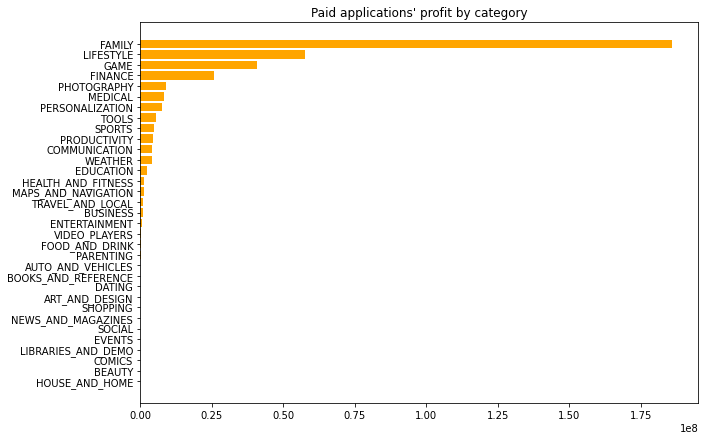

In [6]:
#MARKET PROFIT BY CATEGORY

data_category = df.groupby('Category').sum()['Total_money'].sort_values(ascending= True)

x = data_category.index.values
y= data_category.values
x_pos = [i for i, _ in enumerate(x)]
plt.figure(figsize=(10,7))
plt.barh(x_pos, y, color='orange')
plt.title("Paid applications\' profit by category")
plt.yticks(x_pos, x)

plt.show()


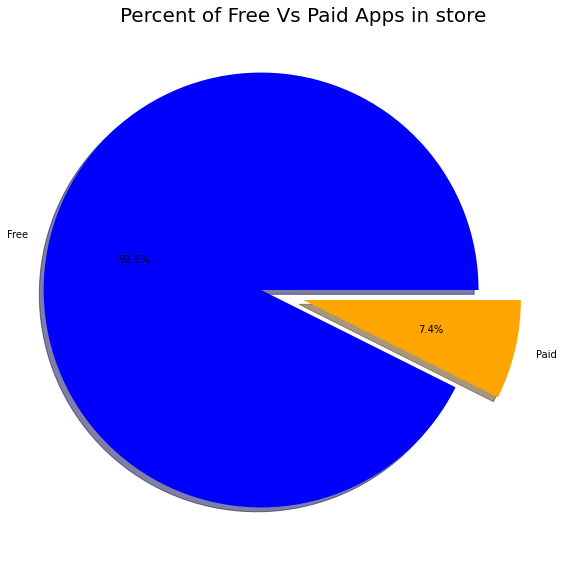

In [7]:
#PERCENT OF FREE VS PAID APPS IN STORE
plt.figure(figsize=(10,10))
labels = df['Type'].value_counts(sort = True).index
sizes = df['Type'].value_counts(sort = True)
colors = ["blue","orange"]
explode = (0.2,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Percent of Free Vs Paid Apps in store',size = 20)
plt.show()

In [8]:
#INSTALL RATIO PER APP IN EACH CATEGORY, SORTED

df_install_percent = df.groupby(['Category'])['Installs'].sum()

for category in df_install_percent.index:
    df_install_ratio = pd.DataFrame(columns = ['App', 'Installs','Type'])
    df_install_ratio = df[df['Category'] == category][['App', 'Installs','Type']]
    df_install_ratio['Install_ratio'] = df_install_ratio['Installs'] / df_install_ratio['Installs'].sum() * 100 
    df_install_ratio_sorted=df_install_ratio.sort_values("Install_ratio", ascending=False)   
    print(category)
    display(df_install_ratio_sorted)

ART_AND_DESIGN


,App,Installs,Type,Install_ratio
3,Sketch - Draw & Paint,50000000,Free,40.212936
45,"Canva: Poster, banner, card maker & graphic de...",10000000,Free,8.042587
12,Tattoo Name On My Photo Editor,10000000,Free,8.042587
19,ibis Paint X,10000000,Free,8.042587
4241,Textgram - write on photos,10000000,Free,8.042587
...,...,...,...,...
4764,X Launcher Prime: With OS Style Theme & No Ads,1000,Paid,0.000804
4193,صور حرف H,1000,Free,0.000804
5258,AJ Styles Wallpaper 2018 - AJ Styles HD Wallpaper,1000,Free,0.000804
8888,Spring flowers theme couleurs d t space,100,Free,0.000080


AUTO_AND_VEHICLES


,App,Installs,Type,Install_ratio
8289,AutoScout24 - used car finder,10000000,Free,18.821683
72,"Android Auto - Maps, Media, Messaging & Voice",10000000,Free,18.821683
70,Fines of the State Traffic Safety Inspectorate...,5000000,Free,9.410842
69,Used cars for sale - Trovit,5000000,Free,9.410842
67,Ulysse Speedometer,5000000,Free,9.410842
...,...,...,...,...
5023,Dashboard AE,10,Free,0.000019
6151,BG Middle East,10,Free,0.000019
9964,SpeedApp EV,5,Free,0.000009
7790,CR Monitor,5,Free,0.000009


BEAUTY


,App,Installs,Type,Install_ratio
117,Beauty Camera - Selfie Camera,10000000,Free,36.768694
7021,Best Hairstyles step by step,5000000,Free,18.384347
136,Rainbow Camera,1000000,Free,3.676869
102,Mirror - Zoom & Exposure -,1000000,Free,3.676869
99,"ipsy: Makeup, Beauty, and Tips",1000000,Free,3.676869
105,Filters for Selfie,1000000,Free,3.676869
122,"Sephora: Skin Care, Beauty Makeup & Fragrance ...",1000000,Free,3.676869
107,Ulta Beauty,1000000,Free,3.676869
119,Mirror Camera (Mirror + Selfie Camera),1000000,Free,3.676869
109,Selfie Camera,1000000,Free,3.676869


BOOKS_AND_REFERENCE


,App,Installs,Type,Install_ratio
152,Google Play Books,1000000000,Free,5.217928e+01
139,Wattpad 📖 Free Books,100000000,Free,5.217928e+00
4083,Amazon Kindle,100000000,Free,5.217928e+00
5651,Audiobooks from Audible,100000000,Free,5.217928e+00
4715,Wattpad 📖 Free Books,100000000,Free,5.217928e+00
...,...,...,...,...
4543,Guide for R Programming,5,Free,2.608964e-07
8146,CZ-Help,5,Free,2.608964e-07
8119,BibleRead En Cy Zh Yue,5,Free,2.608964e-07
9993,EW PDF,5,Free,2.608964e-07


BUSINESS


,App,Installs,Type,Install_ratio
10253,File Commander - File Manager/Explorer,100000000,Free,1.157857e+01
194,OfficeSuite : Free Office + PDF Editor,100000000,Free,1.157857e+01
293,OfficeSuite : Free Office + PDF Editor,100000000,Free,1.157857e+01
225,Secure Folder,50000000,Free,5.789283e+00
201,Facebook Pages Manager,50000000,Free,5.789283e+00
...,...,...,...,...
10708,Custos F.O.,1,Free,1.157857e-07
8612,DN Snacks,1,Free,1.157857e-07
8870,PAY DT,1,Free,1.157857e-07
5857,Ay Peruk,1,Free,1.157857e-07


COMICS


,App,Installs,Type,Install_ratio
297,LINE WEBTOON - Free Comics,10000000,Free,17.829714
4724,LINE WEBTOON - Free Comics,10000000,Free,17.829714
8257,Comics,5000000,Free,8.914857
330,Perfect Viewer,5000000,Free,8.914857
320,Narrator's Voice,5000000,Free,8.914857
311,comico Popular Original Cartoon Updated Everyd...,5000000,Free,8.914857
313,"漫咖 Comics - Manga,Novel and Stories",1000000,Free,1.782971
8246,DC Comics,1000000,Free,1.782971
6408,Lezhin Comics - Daily Releases,1000000,Free,1.782971
6407,WebComics,1000000,Free,1.782971


COMMUNICATION


,App,Installs,Type,Install_ratio
335,Messenger – Text and Video Chat for Free,1000000000,Free,4.140396e+00
382,Messenger – Text and Video Chat for Free,1000000000,Free,4.140396e+00
3904,WhatsApp Messenger,1000000000,Free,4.140396e+00
464,Hangouts,1000000000,Free,4.140396e+00
4153,Hangouts,1000000000,Free,4.140396e+00
...,...,...,...,...
6328,BJ - Confidential,10,Free,4.140396e-08
6046,Best Browser BD social networking,10,Free,4.140396e-08
6399,Of the wall Arapaho bk,5,Free,2.070198e-08
10169,Test Server SMS FA,5,Free,2.070198e-08


DATING


,App,Installs,Type,Install_ratio
532,"Chat Rooms, Avatars, Date - Galaxy",10000000,Free,4.841768e+00
7077,Zoosk Dating App: Meet Singles,10000000,Free,4.841768e+00
6302,OkCupid Dating,10000000,Free,4.841768e+00
6288,Hot or Not - Find someone right now,10000000,Free,4.841768e+00
482,Zoosk Dating App: Meet Singles,10000000,Free,4.841768e+00
...,...,...,...,...
625,House party - live chat,10,Free,4.841768e-06
632,Latin Dating,10,Free,4.841768e-06
659,Diamond Engagement Rings,5,Free,2.420884e-06
652,PlusOne,1,Free,4.841768e-07


EDUCATION


,App,Installs,Type,Install_ratio
699,Duolingo: Learn Languages Free,100000000,Free,18.728275
784,Duolingo: Learn Languages Free,100000000,Free,18.728275
820,Edmodo,10000000,Free,1.872828
796,Babbel – Learn Languages,10000000,Free,1.872828
825,ClassDojo,10000000,Free,1.872828
...,...,...,...,...
775,Pocket SAT Math,10000,Free,0.001873
822,Training schedule - AllUniver,10000,Free,0.001873
768,Pocket GMAT Math,10000,Free,0.001873
851,Sago Mini Hat Maker,1000,Paid,0.000187


ENTERTAINMENT


,App,Installs,Type,Install_ratio
865,Google Play Games,1000000000,Free,40.722250
855,Netflix,100000000,Free,4.072225
888,IMDb Movies & TV,100000000,Free,4.072225
893,Talking Ben the Dog,100000000,Free,4.072225
903,IMDb Movies & TV,100000000,Free,4.072225
...,...,...,...,...
989,Kidjo TV Kids Have Fun & Learn,100000,Free,0.004072
976,Tribeca Shortlist - Handpicked Movies,100000,Free,0.004072
907,Animal Planet GO,100000,Free,0.004072
915,Acorn TV: World-class TV from Britain and Beyond,50000,Free,0.002036


EVENTS


,App,Installs,Type,Install_ratio
1008,"StubHub - Tickets to Sports, Concerts & Events",5000000,Free,31.302508
1005,Ticketmaster Event Tickets,5000000,Free,31.302508
1009,Fever,1000000,Free,6.260502
1011,"SeatGeek – Tickets to Sports, Concerts, Broadway",1000000,Free,6.260502
1014,Vivid Seats – Event Tickets,1000000,Free,6.260502
...,...,...,...,...
9329,EG Groups,10,Free,0.000063
9659,FAST EO,10,Free,0.000063
10105,EY Belgium Inhouse Day 2018,10,Free,0.000063
10605,FL Bankers,10,Free,0.000063


FAMILY


,App,Installs,Type,Install_ratio
5856,Google Play Games,1000000000,Free,9.958481e+00
3879,Pou,500000000,Free,4.979240e+00
3888,My Talking Tom,500000000,Free,4.979240e+00
3994,Candy Crush Saga,500000000,Free,4.979240e+00
10186,Farm Heroes Saga,100000000,Free,9.958481e-01
...,...,...,...,...
8019,Learn CW,1,Paid,9.958481e-09
5126,Michael's AG Sound Board,1,Paid,9.958481e-09
5486,AP Series Solution Pro,0,Paid,0.000000e+00
9148,Command & Conquer: Rivals,0,NaN,0.000000e+00


FINANCE


,App,Installs,Type,Install_ratio
1163,Google Pay,100000000,Free,1.298113e+01
5601,Google Pay,100000000,Free,1.298113e+01
1083,Google Pay,100000000,Free,1.298113e+01
1156,PayPal,50000000,Free,6.490567e+00
1076,PayPal,50000000,Free,6.490567e+00
...,...,...,...,...
9101,amm dz,1,Paid,1.298113e-07
10745,FP Boss,1,Free,1.298113e-07
10417,FH Wallet,1,Free,1.298113e-07
9917,Eu Sou Rico,0,Paid,0.000000e+00


FOOD_AND_DRINK


,App,Installs,Type,Install_ratio
1176,McDonald's,10000000,Free,3.877491e+00
1186,McDonald's - McDonald's Japan,10000000,Free,3.877491e+00
8754,Starbucks,10000000,Free,3.877491e+00
1231,Cookpad,10000000,Free,3.877491e+00
1236,Foursquare City Guide,10000000,Free,3.877491e+00
...,...,...,...,...
6154,Sommelier.BG,10,Free,3.877491e-06
10347,Santa Fe Espresso & News,10,Free,3.877491e-06
5262,AJ-COMICS,5,Free,1.938745e-06
6670,Texas Bar-B-Q Rewards,5,Free,1.938745e-06


GAME


,App,Installs,Type,Install_ratio
3896,Subway Surfers,1000000000,Free,3.170173e+00
1750,Subway Surfers,1000000000,Free,3.170173e+00
1872,Subway Surfers,1000000000,Free,3.170173e+00
1654,Subway Surfers,1000000000,Free,3.170173e+00
1700,Subway Surfers,1000000000,Free,3.170173e+00
...,...,...,...,...
5917,Ra Ga Ba,1,Paid,3.170173e-09
5846,YAKALA AY,1,Paid,3.170173e-09
6277,Bi-Tank Ads Free,1,Paid,3.170173e-09
10697,Mu.F.O.,1,Paid,3.170173e-09


HEALTH_AND_FITNESS


,App,Installs,Type,Install_ratio
5596,Samsung Health,500000000,Free,3.673709e+01
1360,Period Tracker - Period Calendar Ovulation Tra...,100000000,Free,7.347417e+00
1386,Calorie Counter - MyFitnessPal,50000000,Free,3.673709e+00
1286,Calorie Counter - MyFitnessPal,50000000,Free,3.673709e+00
1362,Calorie Counter - MyFitnessPal,50000000,Free,3.673709e+00
...,...,...,...,...
8872,Eat Right Diet (by Dt Shreya's Family Diet Cli...,10,Free,7.347417e-07
7526,CL-Customer Care,5,Free,3.673709e-07
6437,BL ONLINE PERSONAL TRAINING,5,Free,3.673709e-07
6239,BH - Fitness & Nutrition,1,Free,7.347417e-08


HOUSE_AND_HOME


,App,Installs,Type,Install_ratio
1446,Zillow: Find Houses for Sale & Apartments for ...,10000000,Free,7.986426e+00
1456,Houzz Interior Design Ideas,10000000,Free,7.986426e+00
4205,tinyCam Monitor FREE,10000000,Free,7.986426e+00
1449,Realtor.com Real Estate: Homes for Sale and Rent,10000000,Free,7.986426e+00
1512,Houzz Interior Design Ideas,10000000,Free,7.986426e+00
...,...,...,...,...
10119,EyPools,100,Free,7.986426e-05
10348,Santa Fe Sentry,100,Free,7.986426e-05
7123,Minwa HA ( C.B ),50,Free,3.993213e-05
5240,AJ Concept Group App,10,Free,7.986426e-06


LIBRARIES_AND_DEMO


,App,Installs,Type,Install_ratio
10729,MX Player Codec (ARMv7),10000000,Free,15.874046
1535,Cardboard,10000000,Free,15.874046
1523,Aviary Stickers: Free Pack,10000000,Free,15.874046
6679,Cardboard,10000000,Free,15.874046
1521,Aviary Effects: Classic,5000000,Free,7.937023
...,...,...,...,...
7221,CE-SETRAM l’Appli,100,Free,0.000159
6800,BT (Usage Interne),100,Free,0.000159
6567,Socle Commun BO du 23-04-2015,100,Paid,0.000159
7172,CD Music,100,Free,0.000159


LIFESTYLE


,App,Installs,Type,Install_ratio
4587,Tinder,100000000,Free,1.869776e+01
1584,Samsung+,50000000,Free,9.348878e+00
10840,iHoroscope - 2018 Daily Horoscope & Astrology,10000000,Free,1.869776e+00
5349,"Muslim Pro - Prayer Times, Azan, Quran & Qibla",10000000,Free,1.869776e+00
1605,Mirror,10000000,Free,1.869776e+00
...,...,...,...,...
9201,EB Experience,1,Free,1.869776e-07
8509,Dr D K Olukoya,1,Free,1.869776e-07
8355,Aproveita DF,1,Free,1.869776e-07
7231,CE AR LOG,1,Free,1.869776e-07


MAPS_AND_NAVIGATION


,App,Installs,Type,Install_ratio
3820,"Waze - GPS, Maps, Traffic Alerts & Live Naviga...",100000000,Free,13.806779
3827,Uber,100000000,Free,13.806779
4634,Uber,100000000,Free,13.806779
4717,"Waze - GPS, Maps, Traffic Alerts & Live Naviga...",100000000,Free,13.806779
6068,Free GPS Navigation,50000000,Free,6.903390
...,...,...,...,...
6744,BS MAPS,50,Free,0.000007
5231,AJ Reminders,10,Free,0.000001
5266,AJ렌터카 법인 카셰어링,10,Free,0.000001
6869,BV Taxi - Driver,10,Free,0.000001


MEDICAL


,App,Installs,Type,Install_ratio
2319,My Calendar - Period Tracker,5000000,Free,11.847169
2310,Blood Pressure,5000000,Free,11.847169
2304,MyChart,1000000,Free,2.369434
6194,mySugr: the blood sugar tracker made just for you,1000000,Free,2.369434
2346,Anatomy Learning - 3D Atlas,1000000,Free,2.369434
...,...,...,...,...
2425,Be the Expert in Phlebotomy - Professional Nur...,1,Paid,0.000002
5160,Kay AH GA,1,Free,0.000002
2471,MyWoundDoctor - Provider,1,Free,0.000002
2454,KBA-EZ Health Guide,1,Free,0.000002


NEWS_AND_MAGAZINES


,App,Installs,Type,Install_ratio
3736,Google News,1000000000,Free,1.854181e+01
9844,Google News,1000000000,Free,1.854181e+01
3816,Google News,1000000000,Free,1.854181e+01
3739,Twitter,500000000,Free,9.270903e+00
3755,Flipboard: News For Our Time,500000000,Free,9.270903e+00
...,...,...,...,...
10762,The FP Shield,10,Free,1.854181e-07
10774,Miss FQ,10,Free,1.854181e-07
7160,INTERKINOIS.CD,5,Free,9.270903e-08
7184,STADE.CD,5,Free,9.270903e-08


PARENTING


,App,Installs,Type,Install_ratio
7229,Pregnancy Tracker & Countdown to Baby Due Date,10000000,Free,31.724771
3576,My baby Piano,5000000,Free,15.862386
3605,Safe365 – Cell Phone GPS Locator For Your Family,1000000,Free,3.172477
3591,My baby Phone,1000000,Free,3.172477
3597,Family Album Mitene: Private Photo & Video Sha...,1000000,Free,3.172477
3618,Baby Panda Musical Genius,1000000,Free,3.172477
3622,Vegetable Fun,1000000,Free,3.172477
3625,Feed Baby - Baby Tracker,1000000,Free,3.172477
3592,Baby Sleep: White noise lullabies for newborns,1000000,Free,3.172477
3588,My baby firework,1000000,Free,3.172477


PERSONALIZATION


,App,Installs,Type,Install_ratio
4031,ZEDGE™ Ringtones & Wallpapers,100000000,Free,4.820451e+00
4812,GO Launcher - 3D parallax Themes & HD Wallpapers,100000000,Free,4.820451e+00
3385,"Hola Launcher- Theme,Wallpaper",100000000,Free,4.820451e+00
7537,"CM Launcher 3D - Theme, Wallpapers, Efficient",100000000,Free,4.820451e+00
6203,Backgrounds HD (Wallpapers),100000000,Free,4.820451e+00
...,...,...,...,...
7521,New CL 2ne1 Wallpaper KPOP live,1,Free,4.820451e-08
10654,Wallpapers FN Herstal FNP 9,1,Free,4.820451e-08
7522,CL 2ne1 Wallpaper KPOP Fans All,1,Free,4.820451e-08
5812,AX Watch for WatchMaker,1,Paid,4.820451e-08


PHOTOGRAPHY


,App,Installs,Type,Install_ratio
2884,Google Photos,1000000000,Free,1.028675e+01
2853,Google Photos,1000000000,Free,1.028675e+01
2808,Google Photos,1000000000,Free,1.028675e+01
5395,Google Photos,1000000000,Free,1.028675e+01
2849,YouCam Perfect - Selfie Photo Editor,100000000,Free,1.028675e+00
...,...,...,...,...
8328,Guide to Nikon Df,10,Paid,1.028675e-07
4139,F Length Sim (no Ads),10,Paid,1.028675e-07
8236,LC-DB,10,Paid,1.028675e-07
8845,PhotoFrame for Synology DS,10,Paid,1.028675e-07


PRODUCTIVITY


,App,Installs,Type,Install_ratio
4170,Google Drive,1000000000,Free,8.023691e+00
3454,Google Drive,1000000000,Free,8.023691e+00
3523,Google Drive,1000000000,Free,8.023691e+00
3450,Microsoft Word,500000000,Free,4.011846e+00
3569,Dropbox,500000000,Free,4.011846e+00
...,...,...,...,...
9264,EC Sampler,1,Free,8.023691e-09
9139,DZ Register,1,Free,8.023691e-09
8876,DT Freight,1,Free,8.023691e-09
7737,CQ Electrical Group,1,Free,8.023691e-09


SHOPPING


,App,Installs,Type,Install_ratio
2790,"AliExpress - Smarter Shopping, Better Living",100000000,Free,3.885987e+00
2763,Amazon Shopping,100000000,Free,3.885987e+00
2698,Flipkart Online Shopping App,100000000,Free,3.885987e+00
2712,Wish - Shopping Made Fun,100000000,Free,3.885987e+00
4102,Wish - Shopping Made Fun,100000000,Free,3.885987e+00
...,...,...,...,...
8869,DT CLOTHINGS,10,Free,3.885987e-07
5245,AJ RETAILS,10,Free,3.885987e-07
8391,DG OFF - 100% Free Coupons & Deals,10,Free,3.885987e-07
7044,GITZ.bz,10,Free,3.885987e-07


SOCIAL


,App,Installs,Type,Install_ratio
2544,Facebook,1000000000,Free,7.991134e+00
3909,Instagram,1000000000,Free,7.991134e+00
4144,Google+,1000000000,Free,7.991134e+00
3943,Facebook,1000000000,Free,7.991134e+00
2554,Google+,1000000000,Free,7.991134e+00
...,...,...,...,...
7147,CB Heroes,5,Free,3.995567e-08
6257,BH Connect,1,Free,7.991134e-09
10101,Amleen Ey,1,Free,7.991134e-09
5307,Ak Parti Yardım Toplama,0,Paid,0.000000e+00


SPORTS


,App,Installs,Type,Install_ratio
4056,Dream League Soccer 2018,100000000,Free,6.542043e+00
4054,3D Bowling,100000000,Free,6.542043e+00
3953,8 Ball Pool,100000000,Free,6.542043e+00
8445,FIFA Soccer,100000000,Free,6.542043e+00
7106,Cricbuzz - Live Cricket Scores & News,50000000,Free,3.271021e+00
...,...,...,...,...
10555,FK Jonava,5,Free,3.271021e-07
10542,FK Mladost Lucani,5,Free,3.271021e-07
10530,FK Sileks,1,Free,6.542043e-08
10541,FK Bregalnica Štip,1,Free,6.542043e-08


TOOLS


,App,Installs,Type,Install_ratio
3234,Google,1000000000,Free,8.731511e+00
4150,Google,1000000000,Free,8.731511e+00
4147,Gboard - the Google Keyboard,500000000,Free,4.365755e+00
3255,SHAREit - Transfer & Share,500000000,Free,4.365755e+00
3907,Google Translate,500000000,Free,4.365755e+00
...,...,...,...,...
10299,FD CANNECT,1,Free,8.731511e-09
5171,Cathy AH,1,Free,8.731511e-09
7370,mySharpBranded CI Test,1,Free,8.731511e-09
8729,DQ Akses,1,Free,8.731511e-09


TRAVEL_AND_LOCAL


,App,Installs,Type,Install_ratio
4098,Maps - Navigate & Explore,1000000000,Free,1.571861e+01
3127,Google Street View,1000000000,Free,1.571861e+01
3223,Maps - Navigate & Explore,1000000000,Free,1.571861e+01
3117,Maps - Navigate & Explore,1000000000,Free,1.571861e+01
3232,Google Street View,1000000000,Free,1.571861e+01
...,...,...,...,...
7176,Kiosque CD,5,Free,7.859303e-08
7182,US 115th CD,5,Free,7.859303e-08
7732,SHUTTLLS CQ - Connect Ride Go,5,Free,7.859303e-08
9532,Ek-yatri: Travel where you Belong,1,Free,1.571861e-08


VIDEO_PLAYERS


,App,Installs,Type,Install_ratio
3665,YouTube,1000000000,Free,1.607200e+01
3687,Google Play Movies & TV,1000000000,Free,1.607200e+01
3928,YouTube,1000000000,Free,1.607200e+01
4365,MX Player,500000000,Free,8.035998e+00
3711,MX Player,500000000,Free,8.035998e+00
...,...,...,...,...
6950,Bx-WiFi-GI,100,Free,1.607200e-06
9237,EC MANAGER,100,Free,1.607200e-06
10823,List iptv FR,100,Free,1.607200e-06
7394,CI Stream,10,Free,1.607200e-07


WEATHER


,App,Installs,Type,Install_ratio
3626,The Weather Channel: Rain Forecast & Storm Alerts,50000000,Free,11.734320
3628,AccuWeather: Daily Forecast & Live Weather Rep...,50000000,Free,11.734320
4725,Weather & Clock Widget for Android,50000000,Free,11.734320
3649,"GO Weather - Widget, Theme, Wallpaper, Efficient",50000000,Free,11.734320
5512,AccuWeather: Daily Forecast & Live Weather Rep...,50000000,Free,11.734320
...,...,...,...,...
7332,Weather Data CH,500,Paid,0.000117
5088,Ag Weather Tools,500,Free,0.000117
4716,W Pro - Weather Forecast & Animated Weather Maps,500,Paid,0.000117
10625,"St. Petersburg, FL - weather and more",10,Free,0.000002


Average app rating =  4.187876743139902
Type
Free    4.182425
Paid    4.261501
Name: Rating, dtype: float64


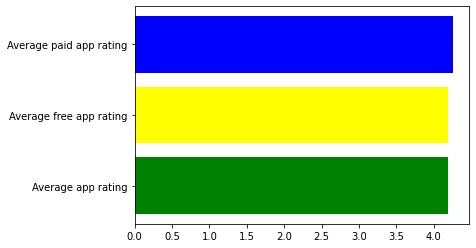

In [9]:
# AVERAGE RATING OF APPS (FREE vs PAID)
avg_app_rating = df.Rating.mean()
print('Average app rating = ', avg_app_rating)

avg_rating_by_type = df.groupby('Type').Rating.mean()
print (avg_rating_by_type)

x = np.array(["Average app rating", "Average free app rating", "Average paid app rating"])
y = np.array([avg_app_rating, avg_rating_by_type['Free'], avg_rating_by_type['Paid']])

plt.barh(x, y, color=['green', 'yellow', 'blue'])
plt.show()

In [10]:
#MOST FINANCIANALLY SUCCSESSFUL APPS

df_paid_apps = df.drop(df.index[df['Type'] == 'Free'])
df_paid_apps.drop(columns=['Type', 'Genres', 'Last Updated', 'Android Ver'])
df_paid_apps.sort_values("Total_money", ascending=False).head(50)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Android Ver,Total_money
2241,Minecraft,FAMILY,4.5,2376564,Varies with device,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",Varies with device,69900000.0
4347,Minecraft,FAMILY,4.5,2375336,Varies with device,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",Varies with device,69900000.0
5351,I am rich,LIFESTYLE,3.8,3547,1.8M,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",4.0.3 and up,39999000.0
5356,I Am Rich Premium,FINANCE,4.1,1867,4.7M,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",4.0 and up,19999500.0
4034,Hitman Sniper,GAME,4.6,408292,29M,10000000,Paid,0.99,Mature 17+,Action,"July 12, 2018",4.1 and up,9900000.0
7417,Grand Theft Auto: San Andreas,GAME,4.4,348962,26M,1000000,Paid,6.99,Mature 17+,Action,"March 21, 2015",3.0 and up,6990000.0
5578,Sleep as Android Unlock,LIFESTYLE,4.5,23966,872k,1000000,Paid,5.99,Everyone,Lifestyle,"June 27, 2018",4.0 and up,5990000.0
2883,Facetune - For Free,PHOTOGRAPHY,4.4,49553,48M,1000000,Paid,5.99,Everyone,Photography,"July 25, 2018",4.1 and up,5990000.0
8804,DraStic DS Emulator,GAME,4.6,87766,12M,1000000,Paid,4.99,Everyone,Action,"July 19, 2016",2.3 and up,4990000.0
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3M,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",4.1 and up,4000000.0


In [11]:
#MOST FINANCIANALLY SUCCSESSFUL APPS

df_paid_apps = df.drop(df.index[df['Type'] == 'Free'])
df_paid_apps = df_paid_apps.drop(columns=['Type', 'Genres', 'Last Updated', 'Android Ver'])
df_paid_apps.sort_values("Total_money", ascending=False).head(50)

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Total_money
2241,Minecraft,FAMILY,4.5,2376564,Varies with device,10000000,6.99,Everyone 10+,69900000.0
4347,Minecraft,FAMILY,4.5,2375336,Varies with device,10000000,6.99,Everyone 10+,69900000.0
5351,I am rich,LIFESTYLE,3.8,3547,1.8M,100000,399.99,Everyone,39999000.0
5356,I Am Rich Premium,FINANCE,4.1,1867,4.7M,50000,399.99,Everyone,19999500.0
4034,Hitman Sniper,GAME,4.6,408292,29M,10000000,0.99,Mature 17+,9900000.0
7417,Grand Theft Auto: San Andreas,GAME,4.4,348962,26M,1000000,6.99,Mature 17+,6990000.0
5578,Sleep as Android Unlock,LIFESTYLE,4.5,23966,872k,1000000,5.99,Everyone,5990000.0
2883,Facetune - For Free,PHOTOGRAPHY,4.4,49553,48M,1000000,5.99,Everyone,5990000.0
8804,DraStic DS Emulator,GAME,4.6,87766,12M,1000000,4.99,Everyone,4990000.0
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3M,10000,400.00,Everyone,4000000.0


In [12]:
#MOST FINANCIANALLY SUCCSESSFUL APPS IN 'FAMILY' CATEGORY

df_family_apps = df_paid_apps.drop(df_paid_apps.index[df_paid_apps['Category'] != 'FAMILY'])
df_family_apps = df_family_apps.drop(columns=['Reviews', 'Size'])
df_family_apps.sort_values("Total_money", ascending=False).head(50)

,App,Category,Rating,Installs,Price,Content Rating,Total_money
4347,Minecraft,FAMILY,4.5,10000000,6.99,Everyone 10+,69900000.0
2241,Minecraft,FAMILY,4.5,10000000,6.99,Everyone 10+,69900000.0
5354,I am Rich Plus,FAMILY,4.0,10000,399.99,Everyone,3999900.0
5366,I Am Rich,FAMILY,3.6,10000,389.99,Everyone,3899900.0
8860,Bloons TD 5,FAMILY,4.6,1000000,2.99,Everyone,2990000.0
2242,Card Wars - Adventure Time,FAMILY,4.3,1000000,2.99,Everyone 10+,2990000.0
9154,NBA JAM by EA SPORTS™,FAMILY,4.3,500000,4.99,Everyone,2495000.0
5362,I Am Rich Pro,FAMILY,4.4,5000,399.99,Everyone,1999950.0
2151,Toca Life: City,FAMILY,4.7,500000,3.99,Everyone,1995000.0
9678,Where's My Water?,FAMILY,4.7,1000000,1.99,Everyone,1990000.0


In [13]:
#MOST FINANCIANALLY SUCCSESSFUL APPS IN OTHER CATEGORIES

df_other_paid_apps = df_paid_apps.drop(df_paid_apps.index[df_paid_apps['Category'] == 'FAMILY'])
df_other_paid_apps = df_other_paid_apps.drop(df_other_paid_apps.index[df_other_paid_apps['Category'] == 'GAME'])                                                                              
df_other_paid_apps = df_other_paid_apps.drop(columns=['Reviews', 'Size'])
df_other_paid_apps.sort_values("Total_money", ascending=False).head(50)

,App,Category,Rating,Installs,Price,Content Rating,Total_money
5351,I am rich,LIFESTYLE,3.8,100000,399.99,Everyone,39999000.0
5356,I Am Rich Premium,FINANCE,4.1,50000,399.99,Everyone,19999500.0
2883,Facetune - For Free,PHOTOGRAPHY,4.4,1000000,5.99,Everyone,5990000.0
5578,Sleep as Android Unlock,LIFESTYLE,4.5,1000000,5.99,Everyone,5990000.0
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,10000,400.00,Everyone,4000000.0
4362,💎 I'm rich,LIFESTYLE,3.8,10000,399.99,Everyone,3999900.0
5355,I am rich VIP,LIFESTYLE,3.8,10000,299.99,Everyone,2999900.0
4133,Weather Live,WEATHER,4.5,500000,5.99,Everyone,2995000.0
7355,Threema,COMMUNICATION,4.5,1000000,2.99,Everyone,2990000.0
9941,Tasker,TOOLS,4.6,1000000,2.99,Everyone,2990000.0


In [14]:
#TOP RATED APPS

df_top_rated=df.drop(columns=['Reviews','Genres', 'Last Updated', 'Android Ver', 'Total_money'])
df_top_rated.sort_values("Rating", ascending=False).head(50)

,App,Category,Rating,Size,Installs,Type,Price,Content Rating
5139,Chenoweth AH,MEDICAL,5.0,27M,100,Free,0.00,Everyone
7799,Cr Aviation Academy,FAMILY,5.0,22M,100,Free,0.00,Everyone
7756,iReadMe,PRODUCTIVITY,5.0,22M,100,Free,0.00,Everyone
7754,CricQuick,SPORTS,5.0,1.5M,50,Free,0.00,Everyone
7731,CQ ESPM,BUSINESS,5.0,3.4M,5,Free,0.00,Everyone
4988,Easy Hotspot Ad Free,TOOLS,5.0,3.3M,10,Paid,0.99,Everyone
329,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,37M,1000,Free,0.00,Everyone
9806,Dr. ES PV Calculator,TOOLS,5.0,11M,500,Free,0.00,Everyone
9810,ES Billing System (Offline App),PRODUCTIVITY,5.0,4.2M,100,Free,0.00,Everyone
7698,CP Trivia,GAME,5.0,12M,100,Free,0.00,Everyone


In [15]:
df_top_rated.drop(df_top_rated[df_top_rated['Installs'] <100000].index, inplace=True)
df_top_rated.sort_values("Rating", ascending=False).head(50)

,App,Category,Rating,Size,Installs,Type,Price,Content Rating
10254,FC Porto,SPORTS,4.9,21M,100000,Free,0.00,Everyone
4854,Six Pack in 30 Days - Abs Workout,HEALTH_AND_FITNESS,4.9,13M,10000000,Free,0.00,Everyone
1307,StrongLifts 5x5 Workout Gym Log & Personal Tra...,HEALTH_AND_FITNESS,4.9,10M,1000000,Free,0.00,Everyone
79,Tickets + PDA 2018 Exam,AUTO_AND_VEHICLES,4.9,38M,1000000,Free,0.00,Everyone
1336,Down Dog: Great Yoga Anywhere,HEALTH_AND_FITNESS,4.9,12M,500000,Free,0.00,Teen
9625,JW Library,BOOKS_AND_REFERENCE,4.9,Varies with device,10000000,Free,0.00,Everyone
64,DMV Permit Practice Test 2018 Edition,AUTO_AND_VEHICLES,4.9,27M,100000,Free,0.00,Everyone
61,CDL Practice Test 2018 Edition,AUTO_AND_VEHICLES,4.9,17M,100000,Free,0.00,Everyone
55,Tickets SDA 2018 and Exam from the State Traff...,AUTO_AND_VEHICLES,4.9,33M,100000,Free,0.00,Everyone
1260,Six Pack in 30 Days - Abs Workout,HEALTH_AND_FITNESS,4.9,13M,10000000,Free,0.00,Everyone


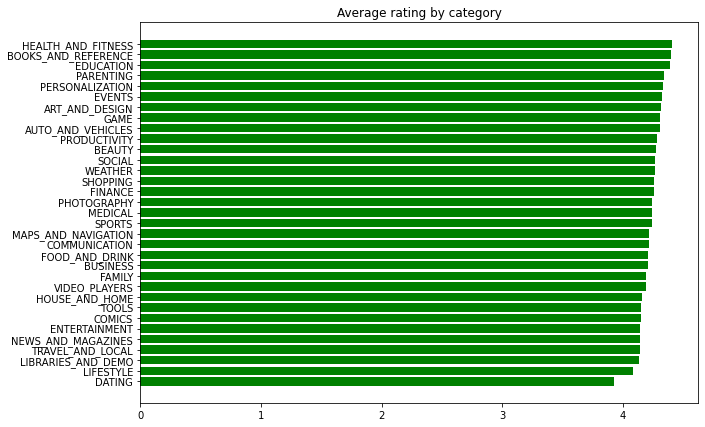

In [17]:
#AVERAGE RATING BY CATEGORY

data_category = df_top_rated.groupby('Category').mean()['Rating'].sort_values(ascending= True)

x = data_category.index.values
y= data_category.values
x_pos = [i for i, _ in enumerate(x)]
plt.figure(figsize=(10,7))
plt.barh(x_pos, y, color='green')
plt.title("Average rating by category")
plt.yticks(x_pos, x)

plt.show()